In [19]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
df = pd.read_csv('Zoo.csv')
print(df.shape)                # Expect (101, 18)
print(df['type'].value_counts())  # Class distribution


(101, 18)
type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [2]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


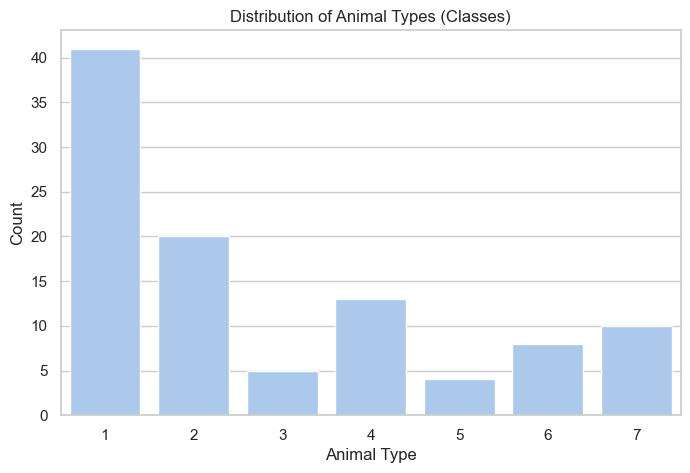

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general plot style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Class distribution (Animal types)
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types (Classes)")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.xticks(ticks=range(0,7), labels=[1,2,3,4,5,6,7])
plt.show()

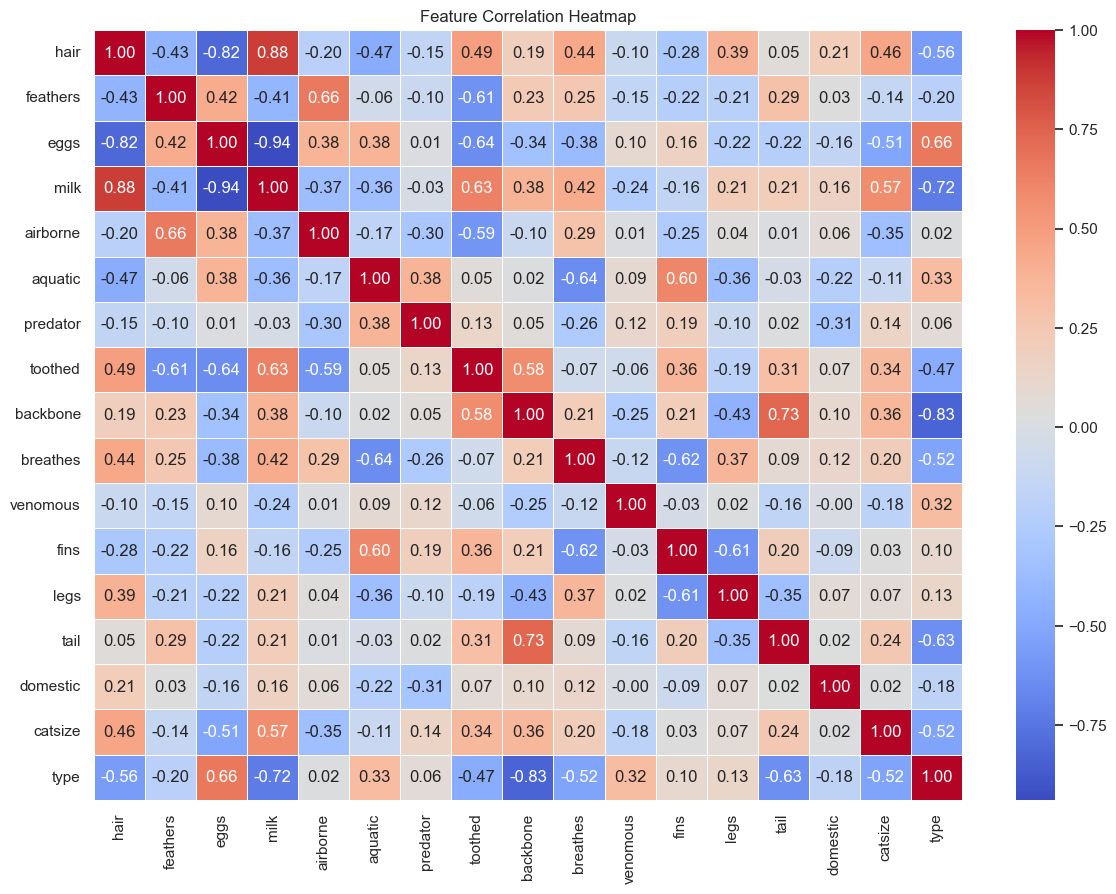

In [5]:
# Set general plot style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# Drop non-numeric 'animal name' for most plots
df_cleaned = df.drop(columns=['animal name'])

# 2. Correlation Heatmap
plt.figure(figsize=(14,10))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

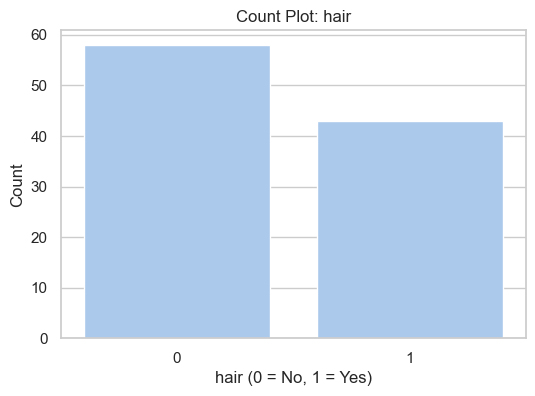

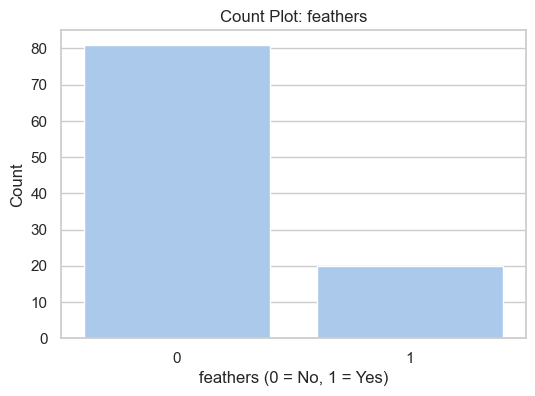

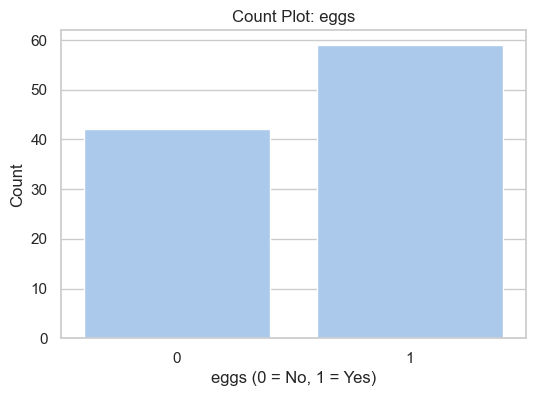

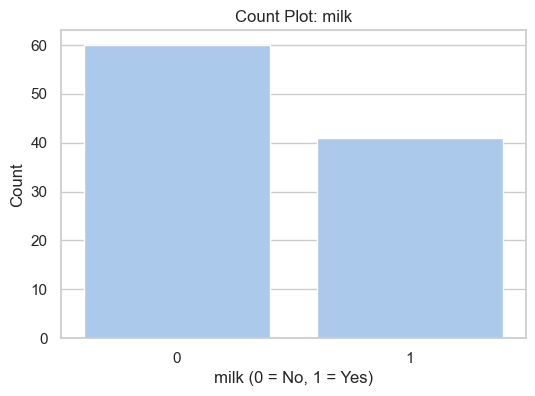

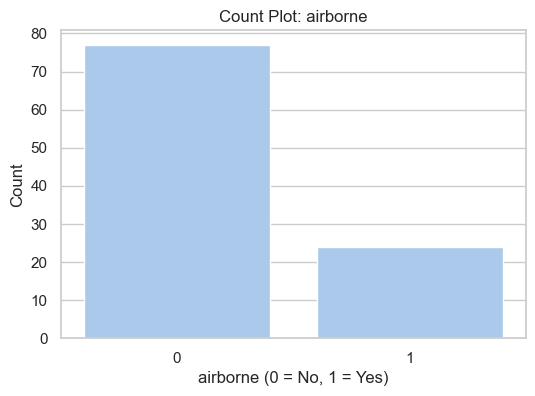

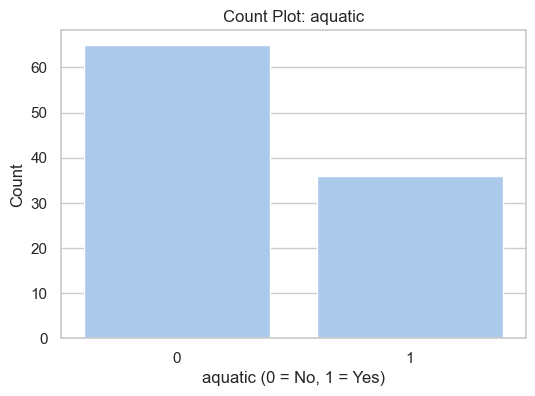

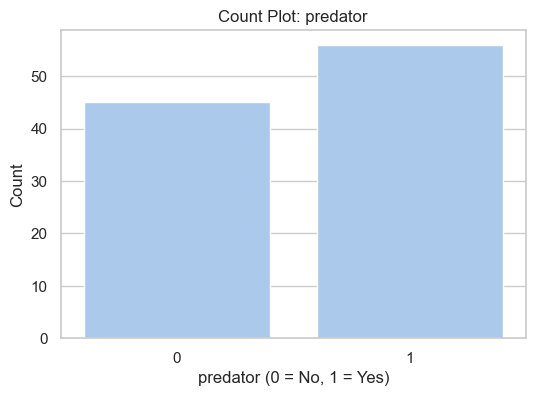

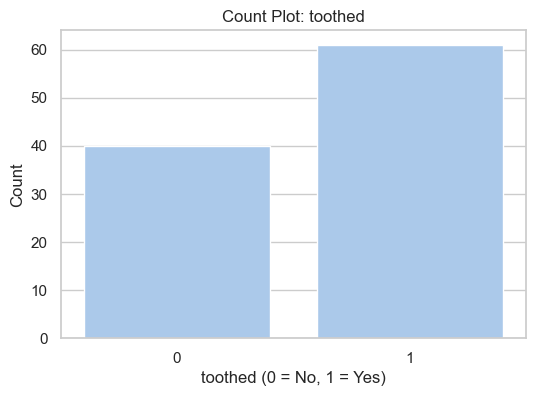

In [6]:
# 3. Count plots for key categorical features
categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=df)
    plt.title(f"Count Plot: {feature}")
    plt.xlabel(f"{feature} (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()

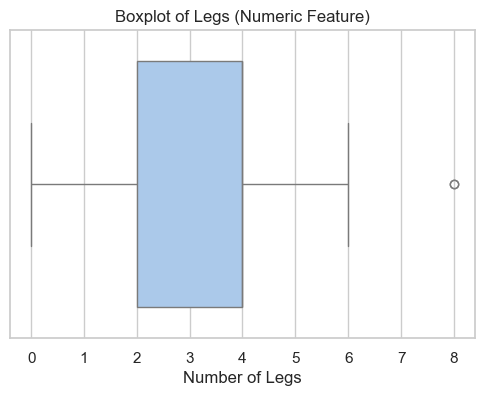

In [7]:
# 4. Boxplot for Legs (check for outliers)
plt.figure(figsize=(6,4))
sns.boxplot(x='legs', data=df)
plt.title("Boxplot of Legs (Numeric Feature)")
plt.xlabel("Number of Legs")
plt.show()

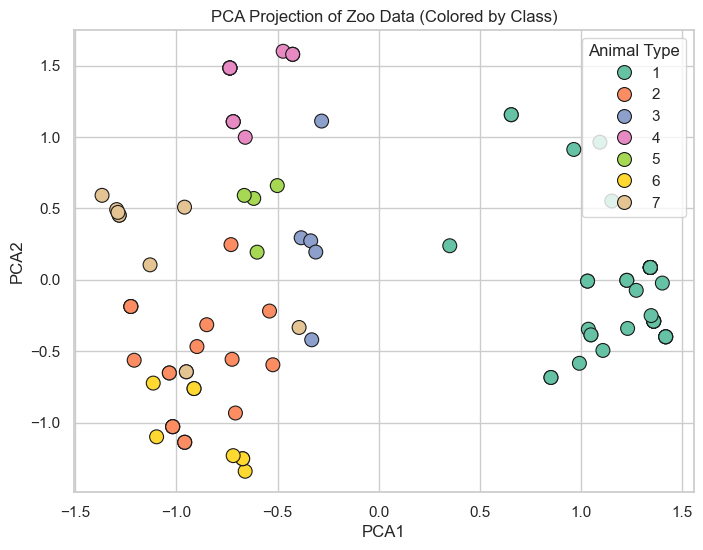

In [8]:
# 5. Pairplot (after PCA to 2D) for class separability
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Scale features (except target)
X = df_cleaned.drop(columns=['type'])
y = df_cleaned['type']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df['type'] = y

# Scatter plot with PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="type", palette="Set2", s=100, edgecolor="k")
plt.title("PCA Projection of Zoo Data (Colored by Class)")
plt.legend(title="Animal Type", loc="upper right")
plt.show()

In [10]:
#Data Partition

from sklearn.model_selection import train_test_split
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=1)
print(X_train.shape, X_test.shape)  # e.g. (80, 16) and (21, 16)


(80, 16) (21, 16)


In [23]:
#KNN Implementation

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [24]:
#Hyperparameter Tuning (Choosing K)

from sklearn.model_selection import cross_val_score
import numpy as np

ks = range(1, 21)
cv_scores = []
for k in ks:
    knn_k = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn_k, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = ks[np.argmax(cv_scores)]
print("CV accuracies:", np.round(cv_scores,3))
print("Best k:", best_k)


CV accuracies: [0.962 0.925 0.888 0.888 0.875 0.875 0.875 0.888 0.888 0.888 0.875 0.862
 0.875 0.85  0.838 0.838 0.838 0.838 0.825 0.812]
Best k: 1


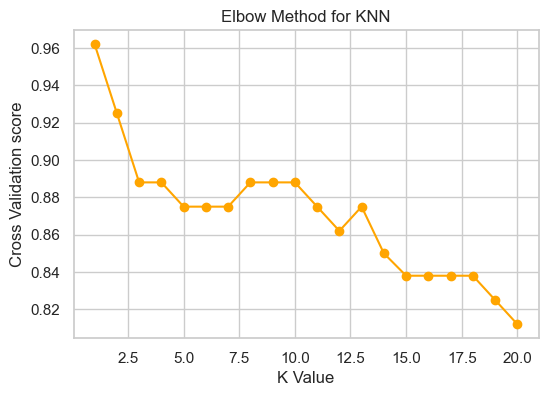

In [38]:
#Visualization elbow method of k-means clustering

plt.figure(figsize=(6,4))
plt.plot(ks, np.round(cv_scores,3), marker='o', color='orange')
plt.title("Elbow Method for KNN")
plt.xlabel("K Value")
plt.ylabel("Cross Validation score")
plt.grid(True)



In [42]:
#Model Evalution

from sklearn.metrics import classification_report, accuracy_score

knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



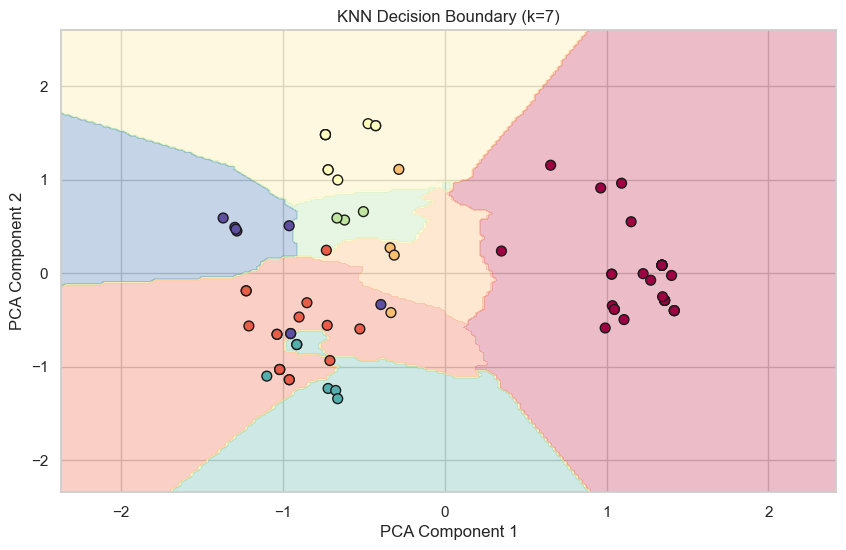

In [41]:

# Reduce to 2D
pca = PCA(n_components=2)
X2 = pca.fit_transform(X_scaled)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, stratify=y, random_state=1)

# Fit KNN on 2D
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)

# Create mesh grid for plotting
x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Spectral')
plt.scatter(X2_train[:,0], X2_train[:,1], c=y2_train, cmap='Spectral', edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (k={7})")
plt.xlabel("PCA Component 1"); plt.ylabel("PCA Component 2")
plt.show()


In [43]:
#Interview Questions

#1.) The key hyperparameters in KNN:
    #n_neighbors (k) – the number of nearest neighbors to use. This directly controls model complexity (small k = more flexible, risk overfitting; large k = smoother decision boundary)
    #Distance metric – how “closeness” is computed between points (e.g. Euclidean, Manhattan)
    #Weights – determines whether all neighbors contribute equally (uniform) or closer ones are weighted more (distance)
    #Algorithm and leaf size – data structure used for neighbor search (auto, kd_tree, ball_tree, brute) and tree leaf_size. These affect efficiency but not the prediction outcome
    #p (Minkowski parameter) – when using the Minkowski metric, p specifies L1 vs L2 distance (p=1→Manhattan, p=2→Euclidean)

#2.) distance metrics can be used in KNN:
    # Common metrics include Euclidean distance (L2 norm) – the default in scikit-learn (Minkowski with p=2)
    # Manhattan distance (L1 norm) – Minkowski with p=1 and Minkowski distance in general (tunable p)
    # Other options are Chebyshev distance (L∞). For categorical or binary data, Hamming/overlap distance can be used
    # In scikit-learn, one can specify these via the metric parameter (e.g. 'euclidean', 'manhattan', 'chebyshev', 'hamming').